In [2]:
import json
import pickle

import numpy as np
import pandas as pd
from scipy.io import loadmat, savemat
import matplotlib.pyplot as plt
from tqdm import tqdm

# import dataholders as dh
import tools.utils as utils
import tools.points_processing as pp

In [3]:
with open('data/data16.pickle', 'rb') as f:
    data = pickle.load(f)

In [4]:
time, lowT, upT = data['time_av'], data['lowT_av'], data['upT_av']

In [ ]:
time, low_labels, up_labels, lowT, upT = pp.prepare_data()

In [ ]:
pos_time_data, pos_temp_data = pp.generate_positive(low_labels, time, lowT, size=20)

print(pos_time_data.shape)

 72%|███████▏  | 567954/791858 [00:03<00:01, 176881.72it/s]

In [ ]:
start = 80000
end   = 750000
neg_time_data, neg_temp_data = pp.generate_negative(low_labels[start:end], time[start:end], lowT[start:end])

print(neg_temp_data.shape)

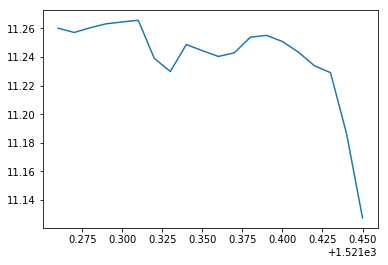

In [13]:
idx = 488

plt.plot(pos_time_data[idx]/1000., pos_temp_data[idx])
plt.show()

In [1]:
idx = 485

plt.plot(neg_time_data[idx]/1000., neg_temp_data[idx])
plt.show()

NameError: name 'plt' is not defined